## Problem Set 3
### MACS 30200
### Leoson Hoay

**Importing necessary packages:**

In [1]:
from keras.datasets import mnist
from keras.datasets import boston_housing
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.regularizers import l1, l2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

C:\Users\leoso\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Part 1: Image classification

**(i) Initial test**

In [2]:
# set the seed
random.seed(171276)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# reshape into 2D tensor
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# standardize to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [5]:
def baseline_model():
    model = Sequential()
    model.add(Dense(512, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Split into training and validation sets
X_train_partial = X_train[0:50000]
X_train_val = X_train[-10000:]
y_train_partial = y_train[0:50000]
y_train_val =  y_train[-10000:]

In [7]:
# Estimate initial model
model = baseline_model()

history = model.fit(X_train_partial, y_train_partial, validation_data=(X_train_val, y_train_val), epochs=200, batch_size=512, verbose=2)

scores = model.evaluate(X_train_val, y_train_val, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
 - 4s - loss: 0.5048 - acc: 0.8423 - val_loss: 0.1529 - val_acc: 0.9543
Epoch 2/200
 - 4s - loss: 0.1510 - acc: 0.9541 - val_loss: 0.1626 - val_acc: 0.9519
Epoch 3/200
 - 4s - loss: 0.0909 - acc: 0.9721 - val_loss: 0.1328 - val_acc: 0.9629
Epoch 4/200
 - 4s - loss: 0.0629 - acc: 0.9811 - val_loss: 0.1238 - val_acc: 0.9658
Epoch 5/200
 - 4s - loss: 0.0433 - acc: 0.9867 - val_loss: 0.0905 - val_acc: 0.9754
Epoch 6/200
 - 4s - loss: 0.0343 - acc: 0.9892 - val_loss: 0.1199 - val_acc: 0.9692
Epoch 7/200
 - 4s - loss: 0.0258 - acc: 0.9928 - val_loss: 0.0910 - val_acc: 0.9789
Epoch 8/200
 - 4s - loss: 0.0231 - acc: 0.9932 - val_loss: 0.0890 - val_acc: 0.9809
Epoch 9/200
 - 4s - loss: 0.0189 - acc: 0.9941 - val_loss: 0.0758 - val_acc: 0.9822
Epoch 10/200
 - 5s - loss: 0.0164 - acc: 0.9954 - val_loss: 0.1328 - val_acc: 0.9765
Epoch 11/200
 - 4s - loss: 0.0156 - acc: 0.9956 - val_loss: 0.0973 - val_acc: 0.9817
Epoch 12/200
 - 4s - los

Epoch 97/200
 - 5s - loss: 0.0048 - acc: 0.9993 - val_loss: 0.1922 - val_acc: 0.9826
Epoch 98/200
 - 5s - loss: 0.0060 - acc: 0.9991 - val_loss: 0.1936 - val_acc: 0.9815
Epoch 99/200
 - 5s - loss: 0.0054 - acc: 0.9992 - val_loss: 0.2083 - val_acc: 0.9815
Epoch 100/200
 - 5s - loss: 0.0053 - acc: 0.9994 - val_loss: 0.1796 - val_acc: 0.9843
Epoch 101/200
 - 5s - loss: 0.0072 - acc: 0.9991 - val_loss: 0.2104 - val_acc: 0.9821
Epoch 102/200
 - 5s - loss: 0.0066 - acc: 0.9993 - val_loss: 0.2532 - val_acc: 0.9759
Epoch 103/200
 - 5s - loss: 0.0097 - acc: 0.9988 - val_loss: 0.2279 - val_acc: 0.9779
Epoch 104/200
 - 5s - loss: 0.0077 - acc: 0.9990 - val_loss: 0.1794 - val_acc: 0.9809
Epoch 105/200
 - 5s - loss: 0.0063 - acc: 0.9992 - val_loss: 0.2257 - val_acc: 0.9792
Epoch 106/200
 - 5s - loss: 0.0064 - acc: 0.9992 - val_loss: 0.1710 - val_acc: 0.9828
Epoch 107/200
 - 5s - loss: 0.0083 - acc: 0.9990 - val_loss: 0.2080 - val_acc: 0.9807
Epoch 108/200
 - 5s - loss: 0.0053 - acc: 0.9992 - val_lo

Epoch 193/200
 - 5s - loss: 0.0061 - acc: 0.9992 - val_loss: 0.2081 - val_acc: 0.9812
Epoch 194/200
 - 5s - loss: 0.0029 - acc: 0.9997 - val_loss: 0.2347 - val_acc: 0.9801
Epoch 195/200
 - 5s - loss: 0.0086 - acc: 0.9991 - val_loss: 0.2250 - val_acc: 0.9828
Epoch 196/200
 - 5s - loss: 0.0078 - acc: 0.9992 - val_loss: 0.2088 - val_acc: 0.9819
Epoch 197/200
 - 5s - loss: 0.0080 - acc: 0.9991 - val_loss: 0.2014 - val_acc: 0.9835
Epoch 198/200
 - 5s - loss: 0.0054 - acc: 0.9995 - val_loss: 0.2001 - val_acc: 0.9831
Epoch 199/200
 - 5s - loss: 0.0028 - acc: 0.9997 - val_loss: 0.1830 - val_acc: 0.9852
Epoch 200/200
 - 5s - loss: 9.6733e-04 - acc: 0.9999 - val_loss: 0.1840 - val_acc: 0.9849
Baseline Error: 1.51%


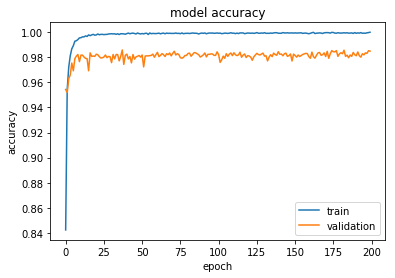

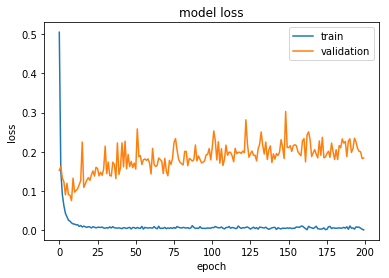

In [8]:
# Accuracy plot
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [9]:
# get epoch index of minimum loss value
val, idx = min((val, idx) for (idx, val) in enumerate(history.history['val_loss']))
idx + 1

9

The minimum loss on the validation set occurs at around epoch 9, after which the model's performance seems to be on a degrading trend from epoch 10 onwards.

**(ii) Implement dropout**

In [10]:
def dropout_model():
    model = Sequential()
    model.add(Dense(512, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [11]:
# Estimate dropout model
model2 = dropout_model()

history2 = model2.fit(X_train_partial, y_train_partial, validation_data=(X_train_val, y_train_val), epochs=200, batch_size=512, verbose=2)

scores2 = model2.evaluate(X_train_val, y_train_val, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores2[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
 - 6s - loss: 0.7683 - acc: 0.7463 - val_loss: 0.2222 - val_acc: 0.9358
Epoch 2/200
 - 6s - loss: 0.2845 - acc: 0.9183 - val_loss: 0.1488 - val_acc: 0.9582
Epoch 3/200
 - 6s - loss: 0.2094 - acc: 0.9396 - val_loss: 0.1268 - val_acc: 0.9647
Epoch 4/200
 - 6s - loss: 0.1736 - acc: 0.9508 - val_loss: 0.0998 - val_acc: 0.9720
Epoch 5/200
 - 6s - loss: 0.1525 - acc: 0.9573 - val_loss: 0.0979 - val_acc: 0.9731
Epoch 6/200
 - 6s - loss: 0.1350 - acc: 0.9621 - val_loss: 0.0906 - val_acc: 0.9739
Epoch 7/200
 - 6s - loss: 0.1212 - acc: 0.9657 - val_loss: 0.0881 - val_acc: 0.9762
Epoch 8/200
 - 6s - loss: 0.1109 - acc: 0.9686 - val_loss: 0.0893 - val_acc: 0.9761
Epoch 9/200
 - 6s - loss: 0.1062 - acc: 0.9705 - val_loss: 0.0913 - val_acc: 0.9758
Epoch 10/200
 - 6s - loss: 0.0965 - acc: 0.9741 - val_loss: 0.0830 - val_acc: 0.9783
Epoch 11/200
 - 6s - loss: 0.0957 - acc: 0.9734 - val_loss: 0.0787 - val_acc: 0.9800
Epoch 12/200
 - 6s - los

Epoch 97/200
 - 6s - loss: 0.0523 - acc: 0.9912 - val_loss: 0.1264 - val_acc: 0.9827
Epoch 98/200
 - 6s - loss: 0.0555 - acc: 0.9910 - val_loss: 0.1131 - val_acc: 0.9830
Epoch 99/200
 - 6s - loss: 0.0612 - acc: 0.9899 - val_loss: 0.1203 - val_acc: 0.9822
Epoch 100/200
 - 6s - loss: 0.0543 - acc: 0.9912 - val_loss: 0.1173 - val_acc: 0.9835
Epoch 101/200
 - 6s - loss: 0.0546 - acc: 0.9907 - val_loss: 0.1149 - val_acc: 0.9833
Epoch 102/200
 - 6s - loss: 0.0555 - acc: 0.9910 - val_loss: 0.1184 - val_acc: 0.9830
Epoch 103/200
 - 6s - loss: 0.0513 - acc: 0.9909 - val_loss: 0.1108 - val_acc: 0.9835
Epoch 104/200
 - 6s - loss: 0.0563 - acc: 0.9914 - val_loss: 0.1226 - val_acc: 0.9823
Epoch 105/200
 - 6s - loss: 0.0537 - acc: 0.9910 - val_loss: 0.1133 - val_acc: 0.9856
Epoch 106/200
 - 6s - loss: 0.0506 - acc: 0.9912 - val_loss: 0.1150 - val_acc: 0.9840
Epoch 107/200
 - 6s - loss: 0.0544 - acc: 0.9909 - val_loss: 0.1123 - val_acc: 0.9843
Epoch 108/200
 - 6s - loss: 0.0529 - acc: 0.9917 - val_lo

Epoch 193/200
 - 6s - loss: 0.0688 - acc: 0.9920 - val_loss: 0.1572 - val_acc: 0.9848
Epoch 194/200
 - 6s - loss: 0.0646 - acc: 0.9924 - val_loss: 0.1590 - val_acc: 0.9843
Epoch 195/200
 - 6s - loss: 0.0788 - acc: 0.9920 - val_loss: 0.1681 - val_acc: 0.9838
Epoch 196/200
 - 6s - loss: 0.0853 - acc: 0.9913 - val_loss: 0.1538 - val_acc: 0.9832
Epoch 197/200
 - 6s - loss: 0.0712 - acc: 0.9925 - val_loss: 0.1741 - val_acc: 0.9825
Epoch 198/200
 - 6s - loss: 0.0844 - acc: 0.9913 - val_loss: 0.1720 - val_acc: 0.9825
Epoch 199/200
 - 6s - loss: 0.0923 - acc: 0.9906 - val_loss: 0.1708 - val_acc: 0.9822
Epoch 200/200
 - 5s - loss: 0.0857 - acc: 0.9911 - val_loss: 0.1737 - val_acc: 0.9831
Baseline Error: 1.69%


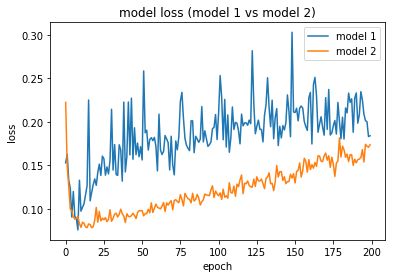

In [12]:
# validation Loss plot
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss (model 1 vs model 2)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model 1', 'model 2'], loc='upper right')
plt.show()

Looking at the graph, the new model generally performs better in minimising validation loss across the epochs.

**(iii) Weight regularization**

In [13]:
def weight_l1_model():
    model = Sequential()
    model.add(Dense(512, input_dim=num_pixels, W_regularizer=l1(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, W_regularizer=l1(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, W_regularizer=l1(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, W_regularizer=l1(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [14]:
# Estimate weight-L1 model
model3 = weight_l1_model()

history3 = model3.fit(X_train_partial, y_train_partial, validation_data=(X_train_val, y_train_val), epochs=200, batch_size=512, verbose=2)

scores3 = model3.evaluate(X_train_val, y_train_val, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores3[1]*100))

C:\Users\leoso\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=784, kernel_initializer="normal", activation="relu", kernel_regularizer=<keras.reg...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\leoso\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal", activation="relu", kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.
C:\Users\leoso\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal", activation="relu", kernel_regularizer=<keras.reg...)`
  """
C:\Users\leoso\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal", activation="relu", kernel_r

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
 - 5s - loss: 18.0443 - acc: 0.6917 - val_loss: 6.3011 - val_acc: 0.7395
Epoch 2/200
 - 5s - loss: 4.1572 - acc: 0.7882 - val_loss: 3.0759 - val_acc: 0.7953
Epoch 3/200
 - 5s - loss: 2.6166 - acc: 0.8254 - val_loss: 2.2951 - val_acc: 0.8526
Epoch 4/200
 - 5s - loss: 2.1132 - acc: 0.8489 - val_loss: 1.9200 - val_acc: 0.8760
Epoch 5/200
 - 5s - loss: 1.8464 - acc: 0.8663 - val_loss: 1.6839 - val_acc: 0.8982
Epoch 6/200
 - 5s - loss: 1.6730 - acc: 0.8795 - val_loss: 1.5623 - val_acc: 0.9069
Epoch 7/200
 - 5s - loss: 1.5504 - acc: 0.8911 - val_loss: 1.4684 - val_acc: 0.9042
Epoch 8/200
 - 5s - loss: 1.4630 - acc: 0.8983 - val_loss: 1.4286 - val_acc: 0.9029
Epoch 9/200
 - 5s - loss: 1.3966 - acc: 0.9063 - val_loss: 1.3721 - val_acc: 0.9096
Epoch 10/200
 - 5s - loss: 1.3444 - acc: 0.9128 - val_loss: 1.2786 - val_acc: 0.9288
Epoch 11/200
 - 5s - loss: 1.3020 - acc: 0.9153 - val_loss: 1.2683 - val_acc: 0.9238
Epoch 12/200
 - 5s - lo

Epoch 97/200
 - 5s - loss: 0.9207 - acc: 0.9573 - val_loss: 0.9195 - val_acc: 0.9577
Epoch 98/200
 - 5s - loss: 0.9216 - acc: 0.9573 - val_loss: 0.9650 - val_acc: 0.9447
Epoch 99/200
 - 5s - loss: 0.9224 - acc: 0.9562 - val_loss: 0.9448 - val_acc: 0.9503
Epoch 100/200
 - 5s - loss: 0.9209 - acc: 0.9563 - val_loss: 0.9024 - val_acc: 0.9638
Epoch 101/200
 - 5s - loss: 0.9210 - acc: 0.9564 - val_loss: 0.9076 - val_acc: 0.9614
Epoch 102/200
 - 5s - loss: 0.9173 - acc: 0.9572 - val_loss: 0.9028 - val_acc: 0.9638
Epoch 103/200
 - 5s - loss: 0.9187 - acc: 0.9570 - val_loss: 0.9148 - val_acc: 0.9568
Epoch 104/200
 - 5s - loss: 0.9200 - acc: 0.9557 - val_loss: 0.9044 - val_acc: 0.9612
Epoch 105/200
 - 5s - loss: 0.9151 - acc: 0.9575 - val_loss: 0.9055 - val_acc: 0.9611
Epoch 106/200
 - 5s - loss: 0.9186 - acc: 0.9561 - val_loss: 0.9299 - val_acc: 0.9544
Epoch 107/200
 - 5s - loss: 0.9145 - acc: 0.9582 - val_loss: 0.9306 - val_acc: 0.9531
Epoch 108/200
 - 5s - loss: 0.9165 - acc: 0.9570 - val_lo

Epoch 193/200
 - 6s - loss: 0.8841 - acc: 0.9600 - val_loss: 0.8856 - val_acc: 0.9599
Epoch 194/200
 - 6s - loss: 0.8854 - acc: 0.9591 - val_loss: 0.8713 - val_acc: 0.9642
Epoch 195/200
 - 6s - loss: 0.8795 - acc: 0.9613 - val_loss: 0.8989 - val_acc: 0.9572
Epoch 196/200
 - 6s - loss: 0.8812 - acc: 0.9605 - val_loss: 0.8740 - val_acc: 0.9620
Epoch 197/200
 - 6s - loss: 0.8823 - acc: 0.9597 - val_loss: 0.9024 - val_acc: 0.9557
Epoch 198/200
 - 5s - loss: 0.8814 - acc: 0.9596 - val_loss: 0.9096 - val_acc: 0.9522
Epoch 199/200
 - 6s - loss: 0.8803 - acc: 0.9608 - val_loss: 0.8726 - val_acc: 0.9633
Epoch 200/200
 - 5s - loss: 0.8811 - acc: 0.9610 - val_loss: 0.8791 - val_acc: 0.9623
Baseline Error: 3.77%


In [15]:
def weight_l2_model():
    model = Sequential()
    model.add(Dense(512, input_dim=num_pixels, W_regularizer=l2(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, W_regularizer=l2(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, W_regularizer=l2(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, W_regularizer=l2(0.001), kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [16]:
# Estimate weight-L2 model
model4 = weight_l2_model()

history4 = model4.fit(X_train_partial, y_train_partial, validation_data=(X_train_val, y_train_val), epochs=200, batch_size=512, verbose=2)

scores4 = model.evaluate(X_train_val, y_train_val, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores4[1]*100))

C:\Users\leoso\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=784, kernel_initializer="normal", activation="relu", kernel_regularizer=<keras.reg...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\leoso\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal", activation="relu", kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.
C:\Users\leoso\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal", activation="relu", kernel_regularizer=<keras.reg...)`
  """
C:\Users\leoso\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="normal", activation="relu", kernel_r

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
 - 6s - loss: 2.3244 - acc: 0.8358 - val_loss: 1.5411 - val_acc: 0.8905
Epoch 2/200
 - 5s - loss: 1.0738 - acc: 0.9349 - val_loss: 0.8145 - val_acc: 0.9409
Epoch 3/200
 - 6s - loss: 0.6743 - acc: 0.9488 - val_loss: 0.7050 - val_acc: 0.9112
Epoch 4/200
 - 6s - loss: 0.4860 - acc: 0.9574 - val_loss: 0.3912 - val_acc: 0.9721
Epoch 5/200
 - 5s - loss: 0.3878 - acc: 0.9638 - val_loss: 0.3260 - val_acc: 0.9747
Epoch 6/200
 - 5s - loss: 0.3264 - acc: 0.9675 - val_loss: 0.3103 - val_acc: 0.9683
Epoch 7/200
 - 5s - loss: 0.2857 - acc: 0.9710 - val_loss: 0.3145 - val_acc: 0.9585
Epoch 8/200
 - 5s - loss: 0.2653 - acc: 0.9717 - val_loss: 0.2388 - val_acc: 0.9770
Epoch 9/200
 - 5s - loss: 0.2342 - acc: 0.9767 - val_loss: 0.2395 - val_acc: 0.9706
Epoch 10/200
 - 5s - loss: 0.2217 - acc: 0.9760 - val_loss: 0.2156 - val_acc: 0.9759
Epoch 11/200
 - 5s - loss: 0.2130 - acc: 0.9756 - val_loss: 0.1986 - val_acc: 0.9787
Epoch 12/200
 - 5s - los

Epoch 97/200
 - 5s - loss: 0.0881 - acc: 0.9913 - val_loss: 0.1286 - val_acc: 0.9806
Epoch 98/200
 - 5s - loss: 0.0850 - acc: 0.9926 - val_loss: 0.1821 - val_acc: 0.9654
Epoch 99/200
 - 5s - loss: 0.0868 - acc: 0.9909 - val_loss: 0.1333 - val_acc: 0.9800
Epoch 100/200
 - 5s - loss: 0.0878 - acc: 0.9911 - val_loss: 0.1544 - val_acc: 0.9731
Epoch 101/200
 - 5s - loss: 0.0884 - acc: 0.9905 - val_loss: 0.1250 - val_acc: 0.9814
Epoch 102/200
 - 5s - loss: 0.0885 - acc: 0.9906 - val_loss: 0.1279 - val_acc: 0.9806
Epoch 103/200
 - 5s - loss: 0.0853 - acc: 0.9920 - val_loss: 0.2315 - val_acc: 0.9552
Epoch 104/200
 - 5s - loss: 0.0872 - acc: 0.9917 - val_loss: 0.1326 - val_acc: 0.9772
Epoch 105/200
 - 5s - loss: 0.0836 - acc: 0.9925 - val_loss: 0.1314 - val_acc: 0.9798
Epoch 106/200
 - 5s - loss: 0.0869 - acc: 0.9916 - val_loss: 0.1293 - val_acc: 0.9808
Epoch 107/200
 - 5s - loss: 0.0886 - acc: 0.9911 - val_loss: 0.1484 - val_acc: 0.9741
Epoch 108/200
 - 5s - loss: 0.0839 - acc: 0.9920 - val_lo

Epoch 193/200
 - 5s - loss: 0.0769 - acc: 0.9925 - val_loss: 0.1364 - val_acc: 0.9781
Epoch 194/200
 - 5s - loss: 0.0756 - acc: 0.9924 - val_loss: 0.1290 - val_acc: 0.9792
Epoch 195/200
 - 5s - loss: 0.0766 - acc: 0.9929 - val_loss: 0.1480 - val_acc: 0.9733
Epoch 196/200
 - 5s - loss: 0.0761 - acc: 0.9925 - val_loss: 0.1262 - val_acc: 0.9798
Epoch 197/200
 - 5s - loss: 0.0761 - acc: 0.9926 - val_loss: 0.1303 - val_acc: 0.9780
Epoch 198/200
 - 5s - loss: 0.0837 - acc: 0.9904 - val_loss: 0.1416 - val_acc: 0.9770
Epoch 199/200
 - 5s - loss: 0.0742 - acc: 0.9934 - val_loss: 0.1247 - val_acc: 0.9785
Epoch 200/200
 - 5s - loss: 0.0762 - acc: 0.9928 - val_loss: 0.1320 - val_acc: 0.9792
Baseline Error: 1.51%


In [ ]:
%matplotlib notebook
# validation Loss plot
plt.plot(history.history['val_loss'][1:])
plt.plot(history2.history['val_loss'][1:])
plt.plot(history3.history['val_loss'][1:])
plt.plot(history4.history['val_loss'][1:])
plt.title('model loss (model 1 vs model 2 vs model 3 vs model 4)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model 1', 'model 2', 'model 3 (L1)', 'model 4 (L2)'], loc='upper right')
plt.show()

Looking at the graph, model 2 seems to perform best.

**(iv) Final Model**

In [18]:
# average loss scores for each model
print(scores[0], scores2[0], scores3[0], scores4[0])

0.1839833736918729 0.17365776179787268 0.8791393455505371 0.1839833736918729


In [19]:
# minimum loss scores for each model
print(min(history.history['val_loss']), min(history2.history['val_loss']), min(history3.history['val_loss']), min(history4.history['val_loss']))

0.07575866104364395 0.07827228937149047 0.871326028251648 0.11821465377807618


In [20]:
# get epoch index of minimum loss value for model 2
val, idx = min((val, idx) for (idx, val) in enumerate(history2.history['val_loss']))
idx + 1

18

The dropout model (Model 2) has the lowest validation loss score amongst the models, occuring at epoch 18.

In [21]:
# Estimate final model
final_model = dropout_model()

history5 = final_model.fit(X_train, y_train, epochs = 18, batch_size=512, verbose=2)

scores5 = model2.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores5[1]*100))

Epoch 1/18
 - 6s - loss: 0.6951 - acc: 0.7716
Epoch 2/18
 - 6s - loss: 0.2612 - acc: 0.9249
Epoch 3/18
 - 6s - loss: 0.1910 - acc: 0.9464
Epoch 4/18
 - 6s - loss: 0.1620 - acc: 0.9538
Epoch 5/18
 - 6s - loss: 0.1362 - acc: 0.9619
Epoch 6/18
 - 6s - loss: 0.1248 - acc: 0.9655
Epoch 7/18
 - 6s - loss: 0.1168 - acc: 0.9672
Epoch 8/18
 - 6s - loss: 0.1035 - acc: 0.9718
Epoch 9/18
 - 6s - loss: 0.0981 - acc: 0.9729
Epoch 10/18
 - 6s - loss: 0.0930 - acc: 0.9746
Epoch 11/18
 - 6s - loss: 0.0910 - acc: 0.9750
Epoch 12/18
 - 6s - loss: 0.0894 - acc: 0.9768
Epoch 13/18
 - 6s - loss: 0.0804 - acc: 0.9781
Epoch 14/18
 - 6s - loss: 0.0790 - acc: 0.9792
Epoch 15/18
 - 6s - loss: 0.0775 - acc: 0.9789
Epoch 16/18
 - 6s - loss: 0.0736 - acc: 0.9804
Epoch 17/18
 - 6s - loss: 0.0707 - acc: 0.9807
Epoch 18/18
 - 6s - loss: 0.0715 - acc: 0.9811
Baseline Error: 1.59%


In [22]:
scores5

[0.16253787892210625, 0.9841]

The test set scores show that this model performs slightly better (test set accuracy = 98.4%) than the baseline model in the book (97.8%).

### Part 2: Scalar regression 

In [23]:
(X_train2, y_train2), (X_test2, y_test2) = boston_housing.load_data()

In [24]:
# Scaling data
scaler = StandardScaler()
scaler.fit(X_train2)
X_train2_scaled = scaler.transform(X_train2)
scaler2 = StandardScaler()
scaler2.fit(X_test2)
X_test2_scaled = scaler2.transform(X_test2)

In [25]:
def scalar_reg_model(layers1, layers2):
    model = Sequential()
    model.add(Dense(layers1, input_dim=X_train2.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(layers2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])
    return model

In [26]:
kf = KFold(n_splits=10)

In [27]:
kf.get_n_splits(X_train2_scaled)

10

### Testing Models

In [28]:
count = 0
mse_list = []

# 64, 64, 100 epochs
for train_index, val_index in kf.split(X_train2_scaled):
    count += 1
    print("Processing fold", count, "...")
    X_train2_partial = X_train2_scaled[train_index]
    y_train2_partial = y_train2[train_index]
    X_train2_val = X_train2_scaled[val_index]
    y_train2_val = y_train2[val_index]
    
    sr_model = scalar_reg_model(64, 64)

    history6 = sr_model.fit(X_train2_partial, y_train2_partial, validation_data=(X_train2_val, y_train2_val), epochs=100, batch_size=1, verbose=0)
    val, idx = min((val, idx) for (idx, val) in enumerate(history6.history['mean_squared_error']))
    
    print("Fold", count)
    print("Minimum MSE:", val, "Epoch", idx+1)
    mse_list.append(val)

print("")
print("Average MSE of model 1:", sum(mse_list)/len(mse_list))

Processing fold 1 ...
Fold 1
Minimum MSE: 5.356613079056211 Epoch 100
Processing fold 2 ...
Fold 2
Minimum MSE: 5.466480786453978 Epoch 99
Processing fold 3 ...
Fold 3
Minimum MSE: 4.52822804376772 Epoch 99
Processing fold 4 ...
Fold 4
Minimum MSE: 5.227325769811556 Epoch 100
Processing fold 5 ...
Fold 5
Minimum MSE: 5.712254603930238 Epoch 91
Processing fold 6 ...
Fold 6
Minimum MSE: 4.68653542175842 Epoch 100
Processing fold 7 ...
Fold 7
Minimum MSE: 5.397446173104382 Epoch 98
Processing fold 8 ...
Fold 8
Minimum MSE: 3.2815690274151414 Epoch 98
Processing fold 9 ...
Fold 9
Minimum MSE: 5.3113810068607386 Epoch 99
Processing fold 10 ...
Fold 10
Minimum MSE: 5.836184436542251 Epoch 98

Average MSE of model 1: 5.080401834870064


In [29]:
count2 = 0
mse_list2 = []

# 128, 128, 100 epochs
for train_index, val_index in kf.split(X_train2_scaled):
    count2 += 1
    print("Processing fold", count2, "...")
    X_train2_partial = X_train2_scaled[train_index]
    y_train2_partial = y_train2[train_index]
    X_train2_val = X_train2_scaled[val_index]
    y_train2_val = y_train2[val_index]
    
    sr_model2 = scalar_reg_model(128, 128)

    history7 = sr_model2.fit(X_train2_partial, y_train2_partial, validation_data=(X_train2_val, y_train2_val), epochs=100, batch_size=1, verbose=0)
    val2, idx2 = min((val2, idx2) for (idx2, val2) in enumerate(history7.history['mean_squared_error']))
    
    print("Fold", count2)
    print("Minimum MSE:", val2, "Epoch", idx2+1)
    mse_list2.append(val2)

print("")
print("Average MSE of model 2:", sum(mse_list2)/len(mse_list2))

Processing fold 1 ...
Fold 1
Minimum MSE: 4.3882159396865195 Epoch 97
Processing fold 2 ...
Fold 2
Minimum MSE: 4.119018001350542 Epoch 92
Processing fold 3 ...
Fold 3
Minimum MSE: 4.371288392509623 Epoch 98
Processing fold 4 ...
Fold 4
Minimum MSE: 4.109444587119116 Epoch 92
Processing fold 5 ...
Fold 5
Minimum MSE: 4.433228134335978 Epoch 99
Processing fold 6 ...
Fold 6
Minimum MSE: 4.129844895541162 Epoch 99
Processing fold 7 ...
Fold 7
Minimum MSE: 4.188985832497905 Epoch 96
Processing fold 8 ...
Fold 8
Minimum MSE: 2.8802248696731616 Epoch 97
Processing fold 9 ...
Fold 9
Minimum MSE: 4.076006566593436 Epoch 99
Processing fold 10 ...
Fold 10
Minimum MSE: 4.324764348906183 Epoch 99

Average MSE of model 2: 4.1021021568213625


In [30]:
count3 = 0
mse_list3 = []

# 128, 64, 100 epochs
for train_index, val_index in kf.split(X_train2_scaled):
    count3 += 1
    print("Processing fold", count3, "...")
    X_train2_partial = X_train2_scaled[train_index]
    y_train2_partial = y_train2[train_index]
    X_train2_val = X_train2_scaled[val_index]
    y_train2_val = y_train2[val_index]
    
    sr_model3 = scalar_reg_model(128, 64)

    history8 = sr_model3.fit(X_train2_partial, y_train2_partial, validation_data=(X_train2_val, y_train2_val), epochs=100, batch_size=1, verbose=0)
    val3, idx3 = min((val3, idx3) for (idx3, val3) in enumerate(history8.history['mean_squared_error']))
    
    print("Fold", count3)
    print("Minimum MSE:", val3, "Epoch", idx3+1)
    mse_list3.append(val3)

print("")
print("Average MSE of model 3:", sum(mse_list3)/len(mse_list3))

Processing fold 1 ...
Fold 1
Minimum MSE: 4.835573018164082 Epoch 98
Processing fold 2 ...
Fold 2
Minimum MSE: 4.110729879064545 Epoch 100
Processing fold 3 ...
Fold 3
Minimum MSE: 4.042401232842804 Epoch 100
Processing fold 4 ...
Fold 4
Minimum MSE: 4.136856453572501 Epoch 100
Processing fold 5 ...
Fold 5
Minimum MSE: 5.205847978054138 Epoch 94
Processing fold 6 ...
Fold 6
Minimum MSE: 4.658953732665697 Epoch 97
Processing fold 7 ...
Fold 7
Minimum MSE: 4.583916127734863 Epoch 99
Processing fold 8 ...
Fold 8
Minimum MSE: 2.9588469744937185 Epoch 100
Processing fold 9 ...
Fold 9
Minimum MSE: 4.556095535390144 Epoch 99
Processing fold 10 ...
Fold 10
Minimum MSE: 4.920377155850284 Epoch 100

Average MSE of model 3: 4.400959808783277


In [37]:
count4 = 0
mse_list4 = []

# 256, 128, 100 epochs
for train_index, val_index in kf.split(X_train2_scaled):
    count4 += 1
    print("Processing fold", count4, "...")
    X_train2_partial = X_train2_scaled[train_index]
    y_train2_partial = y_train2[train_index]
    X_train2_val = X_train2_scaled[val_index]
    y_train2_val = y_train2[val_index]
    
    sr_model4 = scalar_reg_model(256, 128)

    history9 = sr_model4.fit(X_train2_partial, y_train2_partial, validation_data=(X_train2_val, y_train2_val), epochs=100, batch_size=1, verbose=0)
    val4, idx4 = min((val4, idx4) for (idx4, val4) in enumerate(history9.history['mean_squared_error']))
    
    print("Fold", count4)
    print("Minimum MSE:", val4, "Epoch", idx4+1)
    mse_list4.append(val4)

print("")
print("Average MSE of model 4:", sum(mse_list4)/len(mse_list4))

Processing fold 1 ...
Fold 1
Minimum MSE: 4.496699501624486 Epoch 98
Processing fold 2 ...
Fold 2
Minimum MSE: 3.9503156552436396 Epoch 94
Processing fold 3 ...
Fold 3
Minimum MSE: 3.898512038605287 Epoch 98
Processing fold 4 ...
Fold 4
Minimum MSE: 4.048920650228286 Epoch 93
Processing fold 5 ...
Fold 5
Minimum MSE: 4.37191561914855 Epoch 98
Processing fold 6 ...
Fold 6
Minimum MSE: 3.802370066519131 Epoch 96
Processing fold 7 ...
Fold 7
Minimum MSE: 4.016211497924704 Epoch 100
Processing fold 8 ...
Fold 8
Minimum MSE: 3.124913685046392 Epoch 99
Processing fold 9 ...
Fold 9
Minimum MSE: 4.219693545880128 Epoch 99
Processing fold 10 ...
Fold 10
Minimum MSE: 4.448377381014857 Epoch 100

Average MSE of model 4: 4.037792964123546


In [38]:
count5 = 0
mse_list5 = []

# 256, 128, 150 epochs
for train_index, val_index in kf.split(X_train2_scaled):
    count5 += 1
    print("Processing fold", count5, "...")
    X_train2_partial = X_train2_scaled[train_index]
    y_train2_partial = y_train2[train_index]
    X_train2_val = X_train2_scaled[val_index]
    y_train2_val = y_train2[val_index]
    
    sr_model5 = scalar_reg_model(256, 128)

    history10 = sr_model5.fit(X_train2_partial, y_train2_partial, validation_data=(X_train2_val, y_train2_val), epochs=150, batch_size=1, verbose=0)
    val5, idx5 = min((val5, idx5) for (idx5, val5) in enumerate(history10.history['mean_squared_error']))
    
    print("Fold", count5)
    print("Minimum MSE:", val5, "Epoch", idx5+1)
    mse_list5.append(val5)

print("")
print("Average MSE of model 5:", sum(mse_list5)/len(mse_list5))

Processing fold 1 ...
Fold 1
Minimum MSE: 2.6683560033531193 Epoch 145
Processing fold 2 ...
Fold 2
Minimum MSE: 2.8391765382350496 Epoch 146
Processing fold 3 ...
Fold 3
Minimum MSE: 2.672731946570347 Epoch 148
Processing fold 4 ...
Fold 4
Minimum MSE: 2.4347799565061417 Epoch 150
Processing fold 5 ...
Fold 5
Minimum MSE: 2.6823016253475034 Epoch 150
Processing fold 6 ...
Fold 6
Minimum MSE: 2.6357366859560147 Epoch 148
Processing fold 7 ...
Fold 7
Minimum MSE: 2.692797951636469 Epoch 148
Processing fold 8 ...
Fold 8
Minimum MSE: 1.955983079516175 Epoch 149
Processing fold 9 ...
Fold 9
Minimum MSE: 2.8806410850097914 Epoch 143
Processing fold 10 ...
Fold 10
Minimum MSE: 2.874331492748432 Epoch 147

Average MSE of model 5: 2.6336836364879046


In [39]:
count6 = 0
mse_list6 = []

# 256, 128, 500 epochs
for train_index, val_index in kf.split(X_train2_scaled):
    count6 += 1
    print("Processing fold", count6, "...")
    X_train2_partial = X_train2_scaled[train_index]
    y_train2_partial = y_train2[train_index]
    X_train2_val = X_train2_scaled[val_index]
    y_train2_val = y_train2[val_index]
    
    sr_model6 = scalar_reg_model(256, 128)

    history11 = sr_model6.fit(X_train2_partial, y_train2_partial, validation_data=(X_train2_val, y_train2_val), epochs=500, batch_size=1, verbose=0)
    val6, idx6 = min((val6, idx6) for (idx6, val6) in enumerate(history11.history['mean_squared_error']))
    
    print("Fold", count6)
    print("Minimum MSE:", val6, "Epoch", idx6+1)
    mse_list6.append(val6)

print("")
print("Average MSE of model 6:", sum(mse_list6)/len(mse_list6))

Processing fold 1 ...
Fold 1
Minimum MSE: 0.7653630179528023 Epoch 488
Processing fold 2 ...
Fold 2
Minimum MSE: 0.754856582049594 Epoch 491
Processing fold 3 ...
Fold 3
Minimum MSE: 0.8294357065911935 Epoch 495
Processing fold 4 ...
Fold 4
Minimum MSE: 0.7511964340482344 Epoch 495
Processing fold 5 ...
Fold 5
Minimum MSE: 0.8625638554821817 Epoch 475
Processing fold 6 ...
Fold 6
Minimum MSE: 0.8261994824803808 Epoch 484
Processing fold 7 ...
Fold 7
Minimum MSE: 0.7726969912926527 Epoch 500
Processing fold 8 ...
Fold 8
Minimum MSE: 0.6861861977682805 Epoch 493
Processing fold 9 ...
Fold 9
Minimum MSE: 0.7771969312046038 Epoch 494
Processing fold 10 ...
Fold 10
Minimum MSE: 0.8678455738515297 Epoch 497

Average MSE of model 6: 0.7893540772721453


### Final Model (Model 6)

In [40]:
sr_model_final = scalar_reg_model(256, 128)

history_final = sr_model_final.fit(X_train2_scaled, y_train2, epochs=500, batch_size=1, verbose=0)

scores_final = sr_model_final.evaluate(X_test2_scaled, y_test2, verbose=0)

In [41]:
scores_final

[10.834677340937596, 10.834677340937596]

Test Set MSE: 10.835